# Arvore de Decisão

**Importe as bibliotecas necessárias**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris

**Carregando a base de dados iris**

In [6]:
iris = load_iris()

**Verificando a descrição do dataset**

In [7]:

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Verificando features_names, target e dados**

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Dividindo os dados em treino e teste**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

**Verificando a forma dos dados**

In [13]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

**Instância do classificador**

In [14]:
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha

**Treinando o Modelo**

In [15]:
clf = clf.fit(X_train, y_train)

**Verificando as features mais importantes para o modelo de arvore de decisão**

In [16]:
clf.feature_importances_

array([0.02777683, 0.01911524, 0.04886925, 0.90423869])

In [17]:
for x,y in zip(iris.feature_names, clf.feature_importances_):
    print(f'{x}:{y}')

sepal length (cm):0.027776829601310764
sepal width (cm):0.01911523757509558
petal length (cm):0.04886924574765924
petal width (cm):0.9042386870759344


**Executando o algoritmo de arvore de decisão com o conjunto de teste**

In [18]:
resultado = clf.predict(X_test)
resultado

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1,
       2])

**Testando uma nova amostra**

In [19]:
teste = np.array([[5.1, 3.5, 1.4, 0.1]])

In [20]:
clf.predict(teste)

array([0])

**Verificando a probalidade**

In [21]:
clf.predict_proba(teste).round(2)

array([[1., 0., 0.]])

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.94      0.94        16
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



**Biblioteca para utilização widgets interativos**

In [23]:
!pip install ipywidgets

**Bibliotecas para visualização da arvore de decisão**

In [24]:
!pip install pydot

In [25]:
!pip install graphviz

**Importando as bibliotecas instaladas**

In [26]:
import pydot
import graphviz
from ipywidgets import interactive

**Visualizando de forma gráfica a arvore gerada**

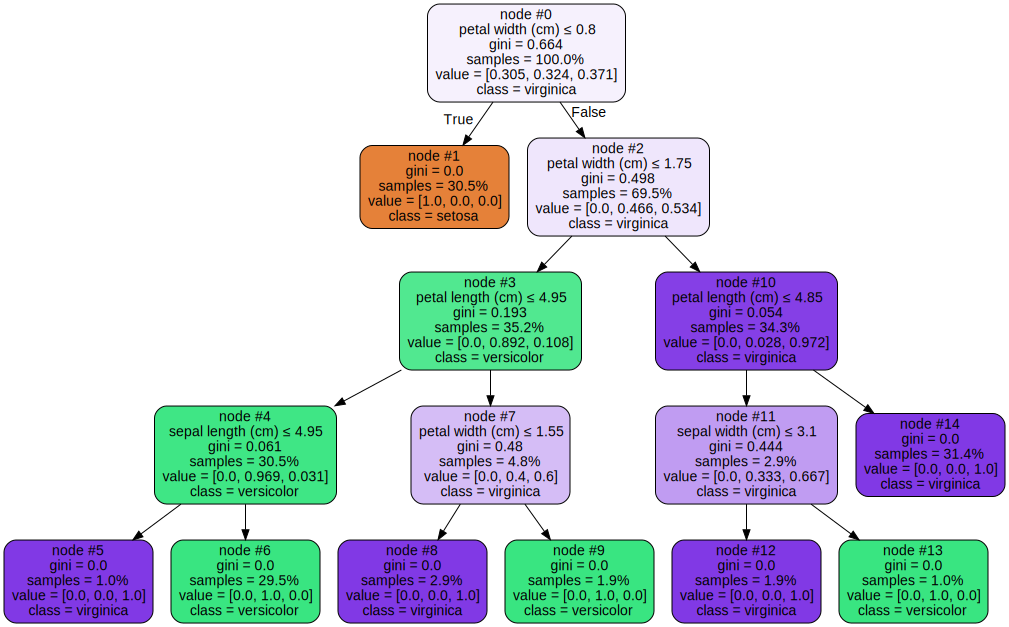

In [27]:
dot_data = tree.export_graphviz(
        clf, # Modelo
        out_file=None, #Se deseja exporta o arquivo
        feature_names=iris.feature_names, # Features do dataset
        class_names=iris.target_names, # Alvo do data set
        filled=True, # Preencher a caixa em volta
        rounded= True, # Borda arredondada
        proportion=True, # Proporção das imagens
        node_ids=True, # Identificação
        rotate=False, # Rodar o gráfico 
        label='all', # Mostrar todos os labels
        special_characters=True # Mostra carácter especiais
)

graph = graphviz.Source(dot_data)
graph

In [28]:
from ipywidgets import interactive
from IPython.display import SVG, display
from graphviz import Source

**Realizando a alteração de parâmetro de forma interativa**

In [29]:
# load dataset
data = load_iris()

# feature matrix
X = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

# class label
class_label = data.target_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf
    )

    estimator.fit(X, y) # Treino do modelo
    graph = Source(tree.export_graphviz(estimator 
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg'))) # Exibição do gráfico
    return estimator

inter=interactive(plot_tree  # Função para plotar a arvore
   , crit = ["gini", "entropy"] # Construção do Menu
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Navegando na estrutura de uma arvore de decisão**

In [30]:
iris = load_iris()

In [31]:
x = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [32]:
# max_leaf_nodes Numero max de folhas
estimator = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
n_nodes = estimator.tree_.node_count # Quantidade nós da nossa arvore 
children_left = estimator.tree_.children_left # Indice dos nós a esquerda
children_right = estimator.tree_.children_right # Indice dos nós a esquerda
feature = estimator.tree_.feature # Caracteristica
threshold = estimator.tree_.threshold # Os limites da arvore

In [34]:
print("Número de nós: {}".format(n_nodes))
print("Indices a esquerda: {}".format(children_left))
print("Indices a direita: {}".format(children_right))
print("Feature: {}".format(feature))
print("Limite (threshold: {}".format(threshold))

Número de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
Feature: [ 3 -2  2 -2 -2]
Limite (threshold: [ 0.80000001 -2.          4.95000005 -2.         -2.        ]


In [35]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.feature_names[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 
 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


#### Extraindo regras da arvore gerada a partir de uma determinada amostra do conjunto de teste X_teste

In [37]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X_test) # Caminho da decisão dos no

    leave_id = estimator.apply(X_test) # Aplica os dados de teste para arvore

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nRegras usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(iris.feature_names,X_test[sample_id]):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 iris.feature_names[node_id],
                 X_test[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
    pred =estimator.predict(X_test[sample_id].reshape(1, -1)) 
    print("\tClasse => %s" %iris.target_names[pred])

In [40]:
extrai_regras(2)


Regras usadas para predizer a amostra 2
sepal length (cm) = 5.5
sepal width (cm) = 4.2
petal length (cm) = 1.4
petal width (cm) = 0.2


id do nó de decisão 0 : (atributo sepal length (cm) com valor = 0.2 <= 0.800000011920929)
	Classe => ['setosa']


**Instalação da biblioteca mlextend para visualização das fronteiras de complexidade**

In [42]:
!pip install mlxtend

**Entendendo o parâmetro min-samples-split para criação do modelo de arvore de decisão**

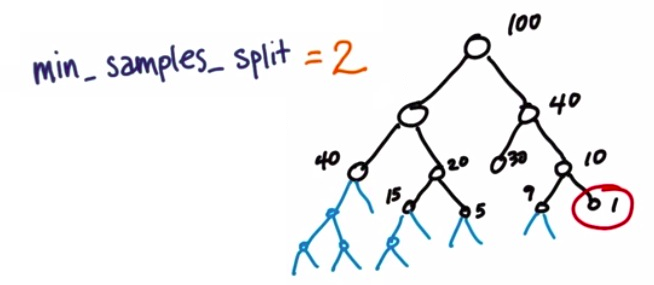

In [43]:
from IPython.display import Image
Image(filename='./arvore-decisao-materiais-apoio/imagens/min-samples-split.png')

**Visualizando as fronteiras criadas pela arvore**

In [45]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [56]:
def visualize_fronteiras(msamples_split):
    X = iris.data[:,[0,2]]
    y = iris.target
    
    clf = tree.DecisionTreeClassifier(min_samples_split=msamples_split)
    tree_model = clf.fit(X,y)
    
    plt.Figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=tree_model, legend=2)
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title('Decision Tree on Iris')
    plt.show()

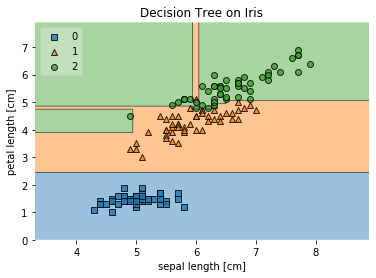

In [57]:
visualize_fronteiras(2)

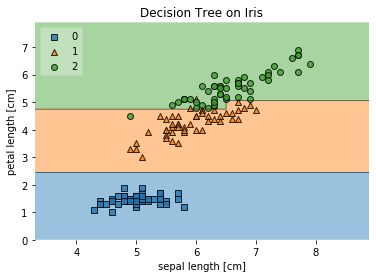

In [64]:
visualize_fronteiras(10)